# Minimising Churn Rate Of Subscription Products

Subscription products often are the main source of revenue for companies across all industries, such as Netflix. These products may come in the form of a 'one size fits all' overcompassing subscription, or in multi-level memberships. Regardless of how they structure their memberships, or what industry they are in, companies usually try to minimise customer churn (a.k.a. subscription cancellations). To retain their customers, these companies are required to firstly identify behavioural patterns that act as a catalyst in disengagement with the product.

- **Market:** The target audience is the entire company's subscription base. They are the ones the company wants to keep.

- **Product:** The subscription products that customers are already enrolled in can provide value that users may not have imagined, or they may have forgotten.

- **Goal:** The objective of this model is to predict which users are likely to churn, so that the company can focus on re-engaging these users with the product. These efforts can be notifications about the benefits of the product, especially focusing on features that are new or that the user has shown to value.
<br><br>
- In this case study we will be working for a fintech that provides a subscription product to its users, which allows them to manage their bank accounts (saving accounts, credit cards ... etc), provides them with personalised coupons, informs them of the latest low-APR loans available in the market, and educates them on the best available methods to save money (e.g. videos or saving money on taxes, free courses on financial health ... etc).
- We are in charge of identifying users who are likely to cancel their subscription so that we can start building new features that they may be interested in. These features can increase the engagement and interest of our users towards the product.
<br><br>
- By subscribing to the membership, our customers have provided us with the data on their finances, as well as how they handle those finances through the product. We also have some demographic information we acquired from them during the sign-up process.
- Financial data can often be unreliable and delayed. As a result, companies can build their marketing models using demographic data, and data related to finances handled through the product itself. Therefore, we will be restricting ourselves to only using that type of data. Furthermore, product-related data is more indicative of what new features we should be creating as a company.

# Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Importing The Dataset

In [2]:
ds = pd.read_csv('churn_data.csv')

In [3]:
ds.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
ds.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


# Taking Care Of Missing Data

In [5]:
ds.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

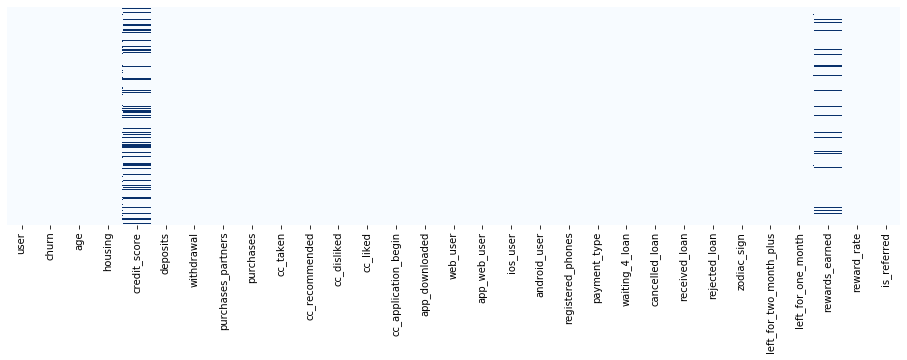

In [6]:
# This can be displayed graphically

plt.rcParams['figure.figsize'] = (16,4)
sns.heatmap(ds.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [7]:
# From the visualisation above, we do not see any missing values for age. 
# We know there are missing values for age as the code above states 'True'for age. 
# From the code below, we observe only 4 missing values for age.
# The above visualisation now makes sense as there is a large number of rows
# (27,000) and as there are only 4 missing values, the line will be too thin to see.

ds.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
# Instead of setting the blank columns of age to the average age, we will simply remove these rows.
# The code below will return the dataset except any rows where the 'age' column had any blanks.

ds = ds[pd.notnull(ds['age'])]

In [9]:
# We observe 26,996 rows as opposed to 27,000 rows, this being a result of removing the rows where 
# the age column was blank.

ds.shape

(26996, 31)

In [10]:
# As the columns 'credit_score' and 'rewards_earned' contain a lot of blanks, we will remove these columns.
# Note: These columns have been removed from our model and analysis.

ds = ds.drop(columns = ['credit_score', 'rewards_earned'])

In [11]:
# We observe 29 columns, 2 less from the original 31.

ds.shape

(26996, 29)

In [12]:
ds.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


# Visualising the dataset

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 29 columns):
user                       26996 non-null int64
churn                      26996 non-null int64
age                        26996 non-null float64
housing                    26996 non-null object
deposits                   26996 non-null int64
withdrawal                 26996 non-null int64
purchases_partners         26996 non-null int64
purchases                  26996 non-null int64
cc_taken                   26996 non-null int64
cc_recommended             26996 non-null int64
cc_disliked                26996 non-null int64
cc_liked                   26996 non-null int64
cc_application_begin       26996 non-null int64
app_downloaded             26996 non-null int64
web_user                   26996 non-null int64
app_web_user               26996 non-null int64
ios_user                   26996 non-null int64
android_user               26996 non-null int64
registered_phones       

In [14]:
ds.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [15]:
ds[ds.housing == 'O'].churn.value_counts()

0    1449
1     722
Name: churn, dtype: int64

In [16]:
ds[ds.churn == 0].housing.value_counts()

na    7651
R     6722
O     1449
Name: housing, dtype: int64

In [17]:
ds2 = ds.drop(columns = ['user'])

# Histograms

In [18]:
column_names = ds2.columns

In [19]:
column_names[3]

'deposits'

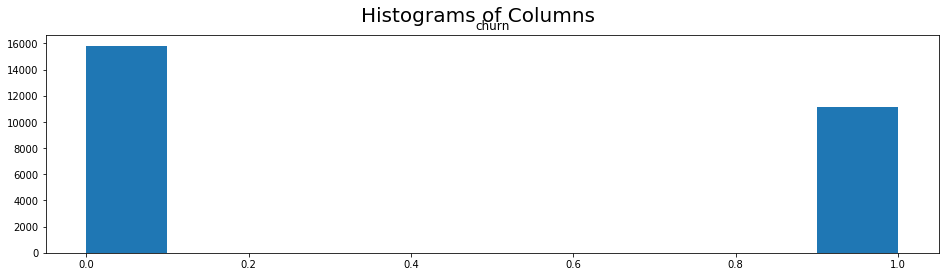

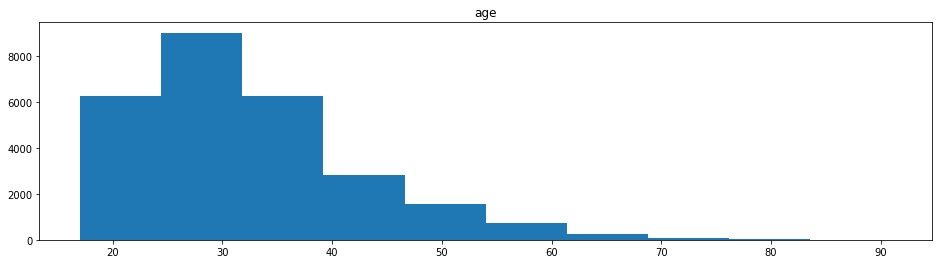

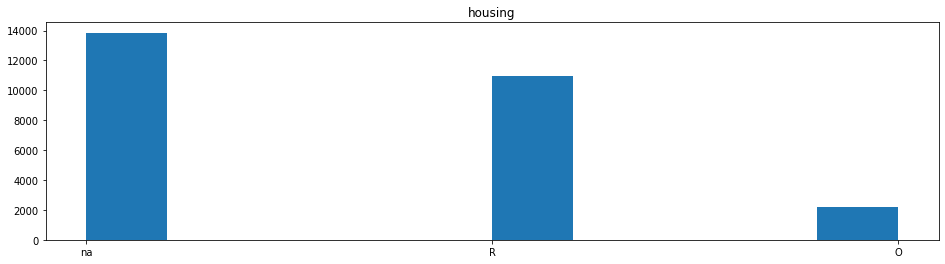

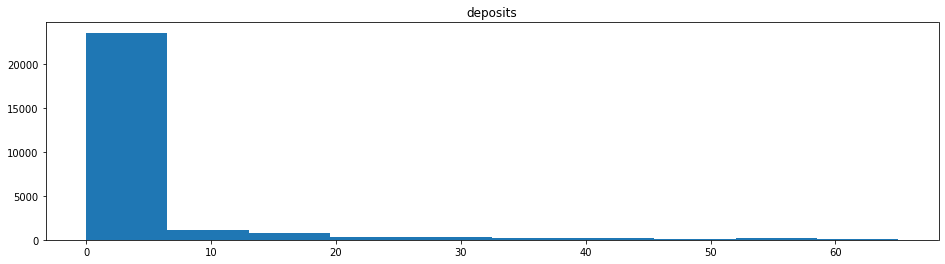

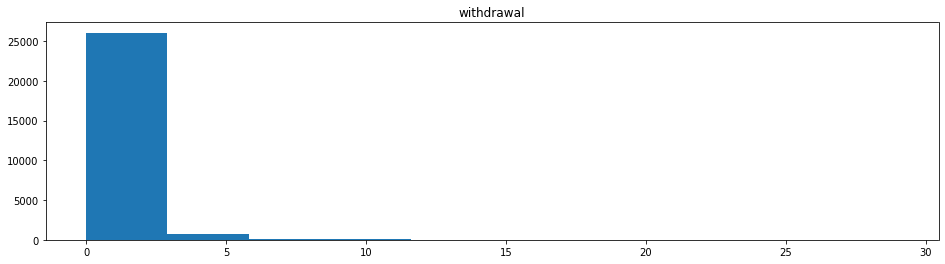

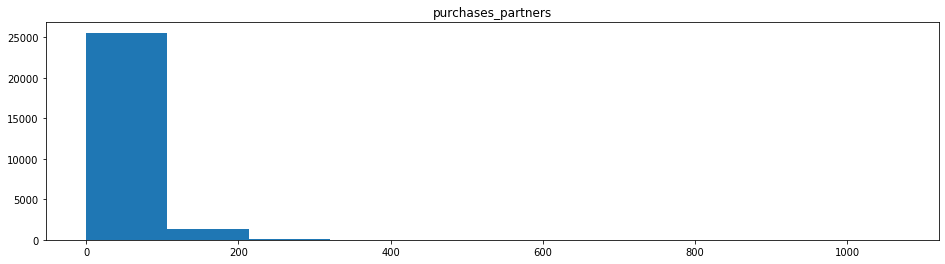

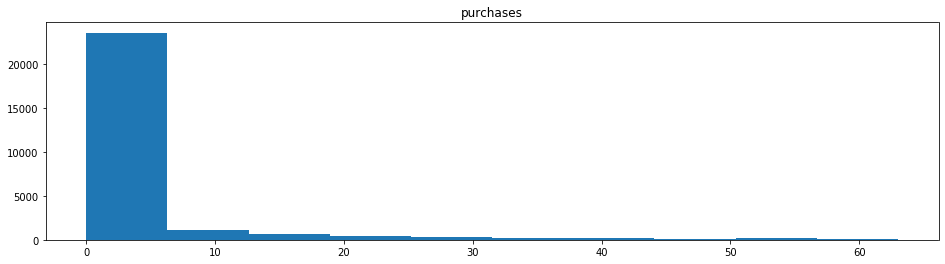

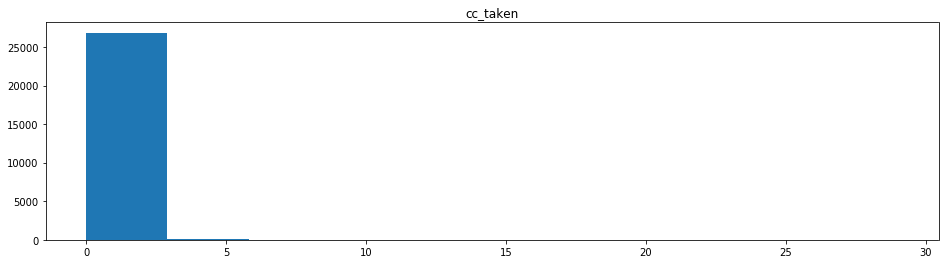

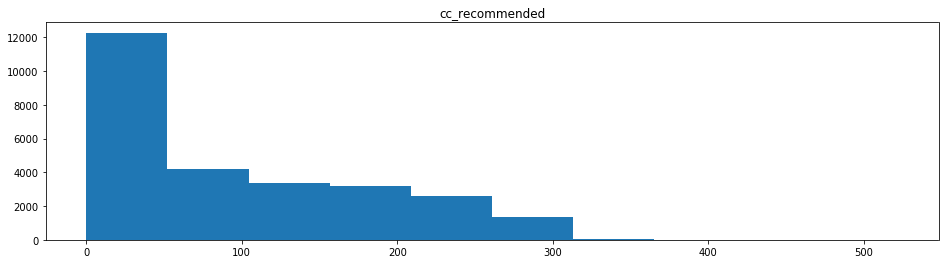

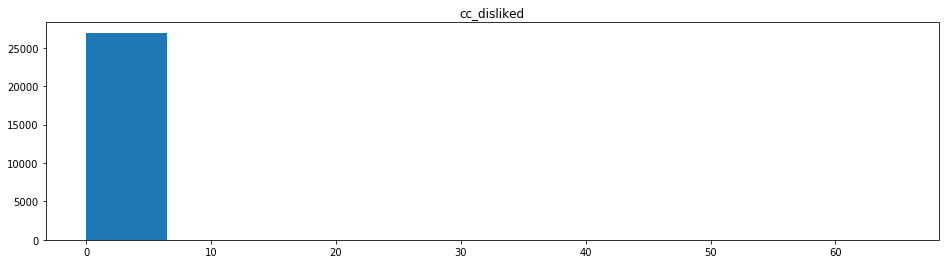

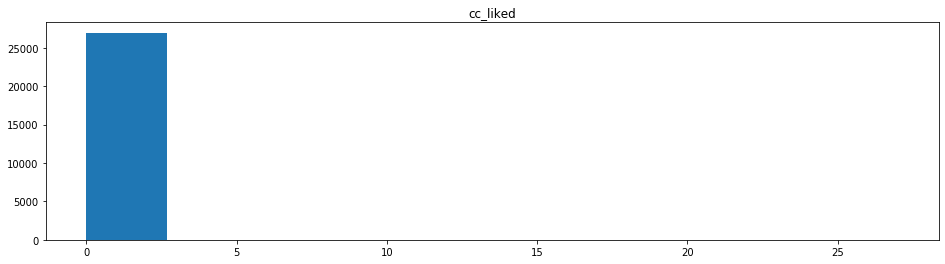

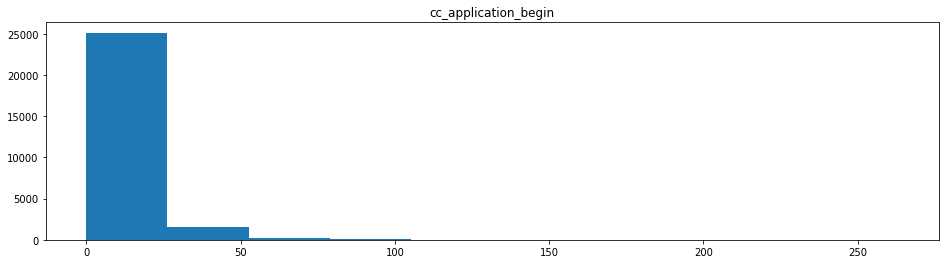

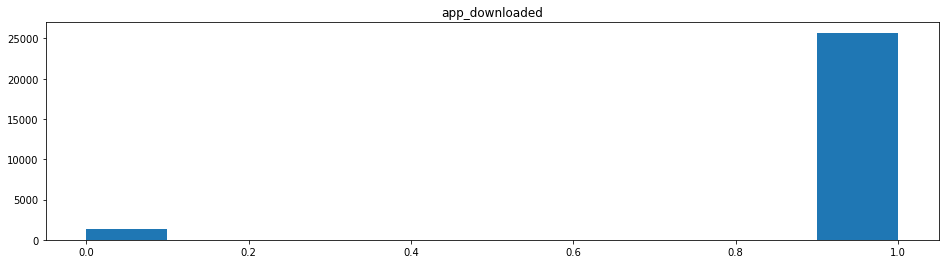

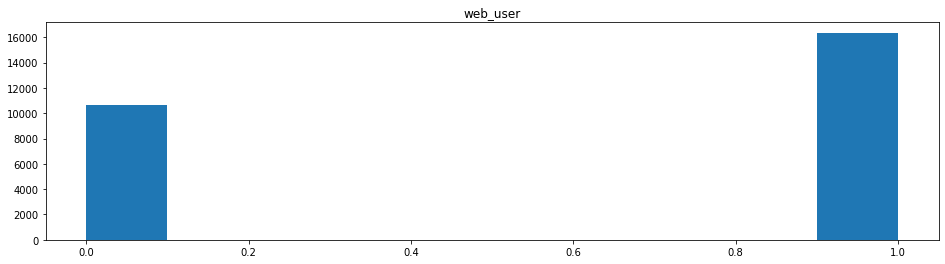

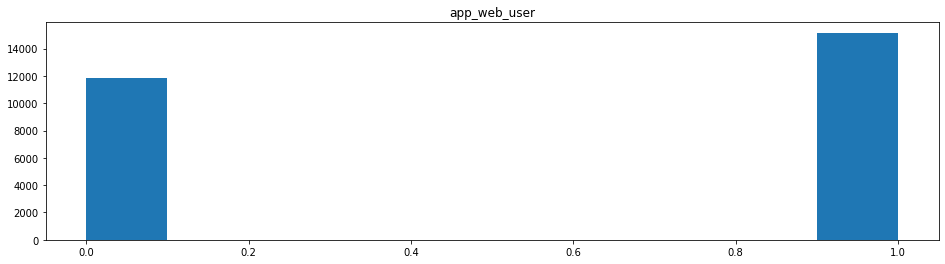

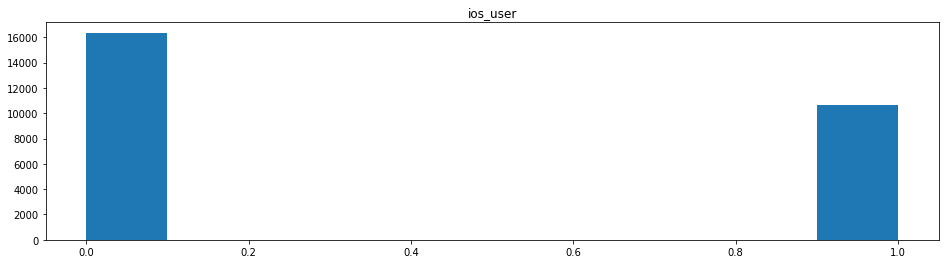

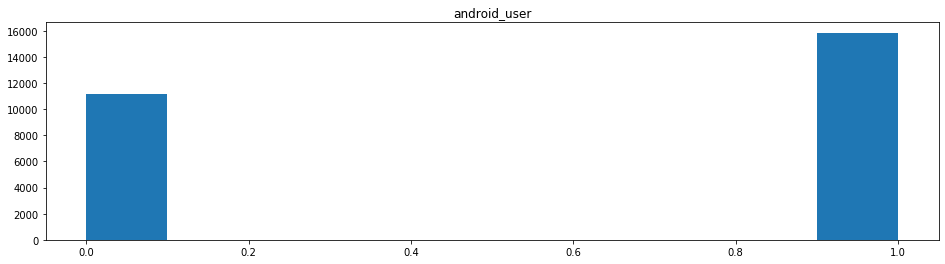

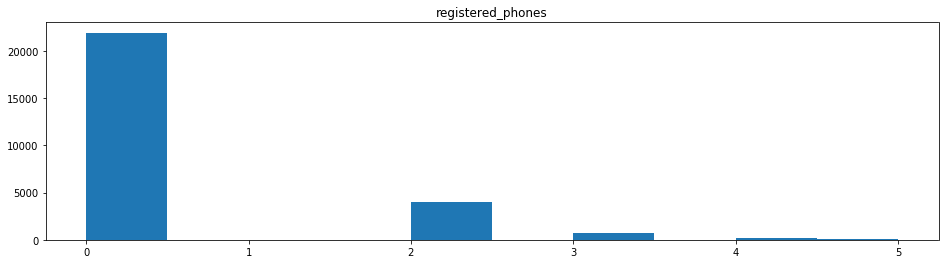

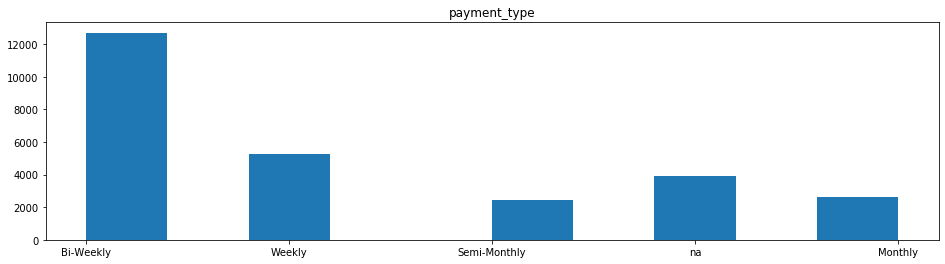

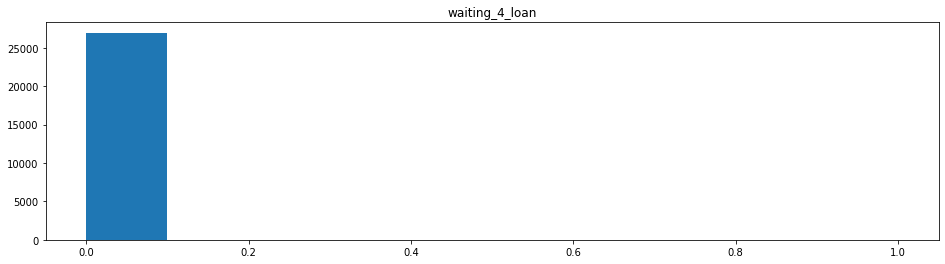

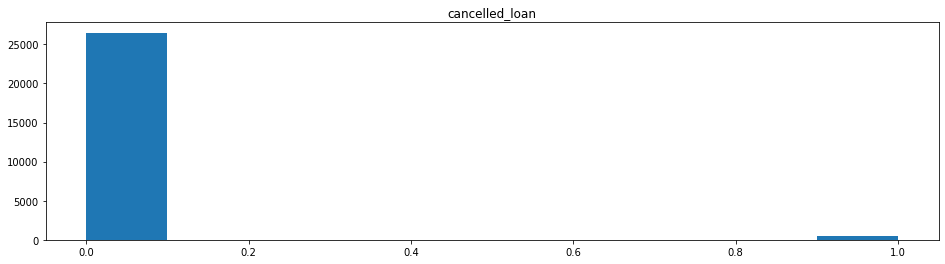

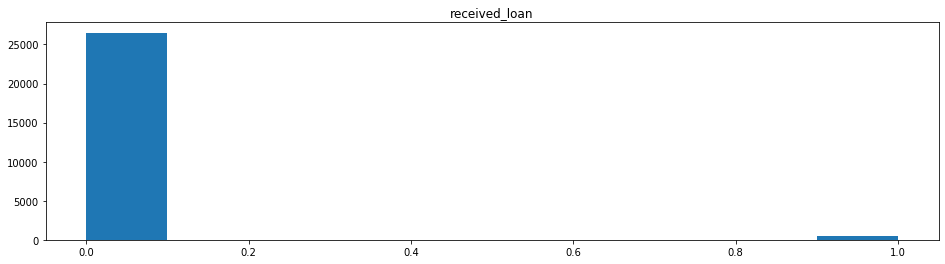

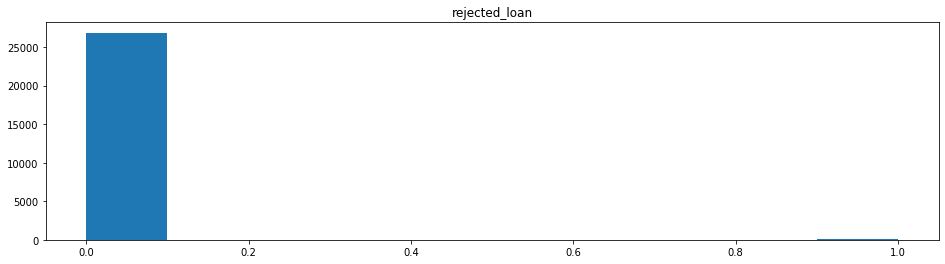

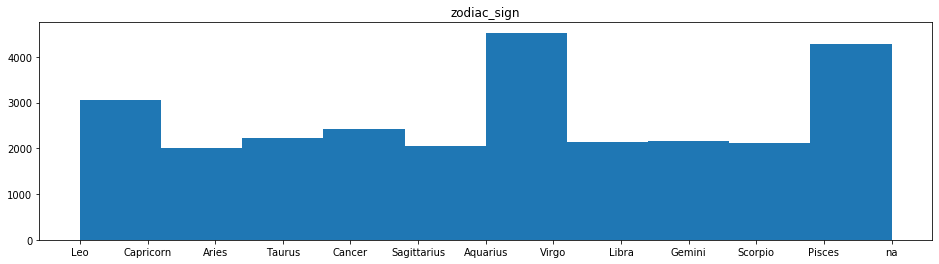

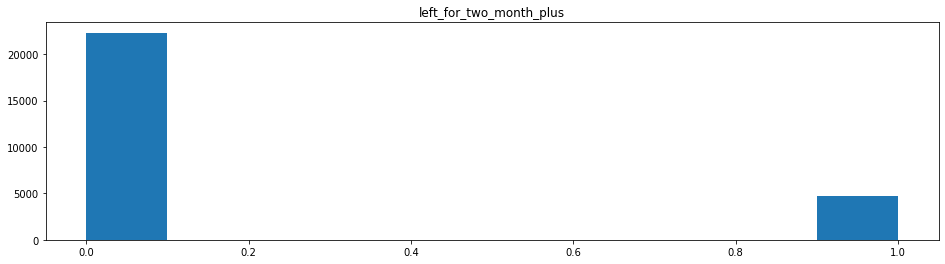

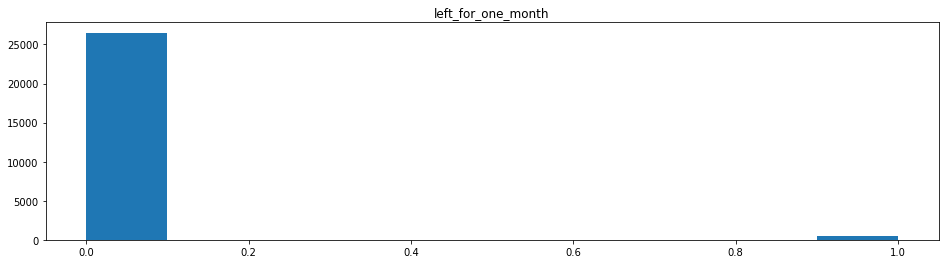

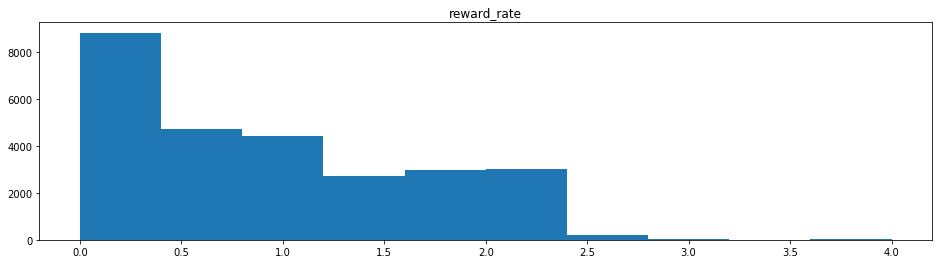

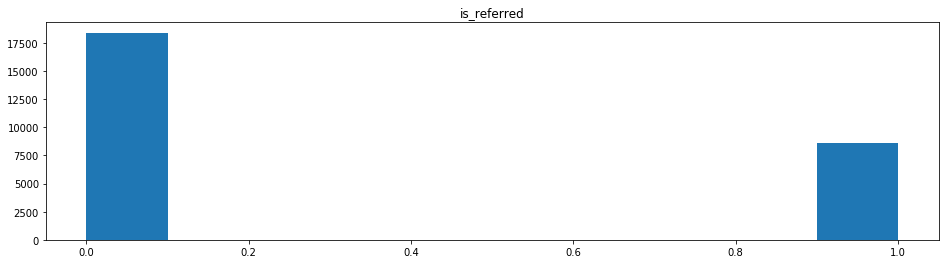

In [20]:
plt.suptitle('Histograms of Columns', fontsize = 20)
for i in column_names:
    plt.title(i)
    plt.hist(ds2[i])
    plt.show()

# Pie Charts

**Note:** We will be making Pie Charts for the binary variables. This is because, if the binary variables are disproportionate (i.e. 99% are 0 and only 1% is 1), and the response variable for the disproportionate binary variable has a majority 0 or 1 as a response. Regardless of the other variables, that particular binary variable will have a greater influence on the response variable, resulting in the predicted response being highly dependent/correlated on that binary variable. We do not wish there to be a higher than desired dependence on any variable.

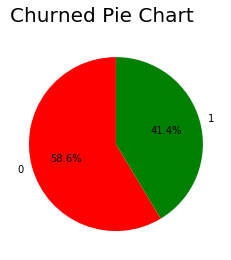

In [21]:
# Pie Chart for the Churn

plt.suptitle('Churned Pie Chart', fontsize = 20)
plt.pie([ds[ds['churn'] == 0]['churn'].count(), ds[ds['churn'] == 1]['churn'].count()],
            labels = ['0','1'], colors = ['r','g'], startangle = 90, autopct='%.1f%%')
plt.show()

In [22]:
# We wish to only visualise Pie Charts for the binary variables.

ds2 = ds[['is_referred', 'app_downloaded',
          'web_user', 'app_web_user', 'ios_user',
          'android_user','waiting_4_loan', 'cancelled_loan',
          'received_loan', 'rejected_loan', 
          'left_for_two_month_plus', 'left_for_one_month']]

In [23]:
columns = ds2.columns

In [24]:
ds2.head()

,is_referred,app_downloaded,web_user,app_web_user,ios_user,android_user,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month
0,0,1,1,1,1,0,0,0,0,0,1,0
1,1,1,1,1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,0,0,0
4,0,1,1,1,0,1,0,0,0,0,1,0


In [25]:
ds2[ds2['is_referred'] == 0]['is_referred'].count()

18411

In [26]:
ds2[ds2['is_referred'] == 1]['is_referred'].count()

8585

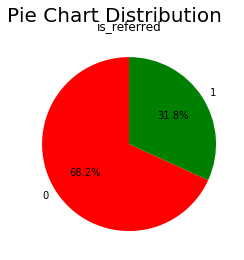

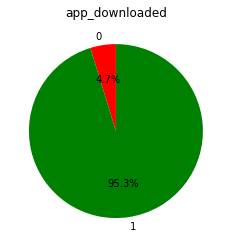

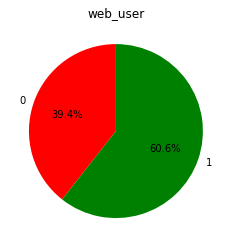

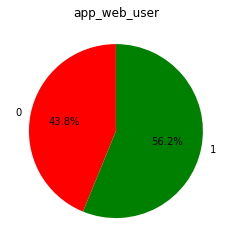

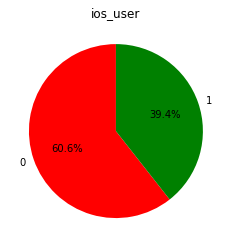

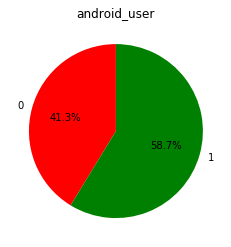

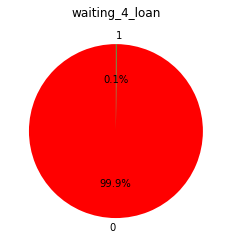

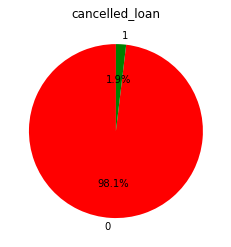

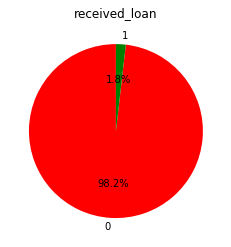

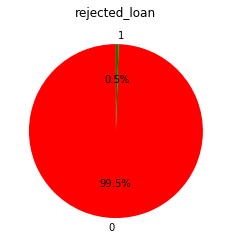

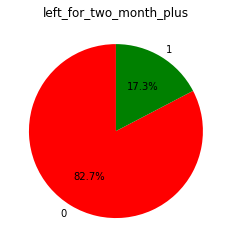

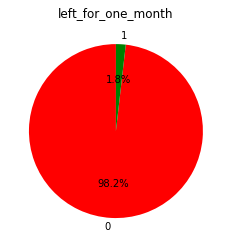

In [27]:
# We observe the following columns being highly disproportionate: 
# app_downloaded, waiting_4_loan, cancelled_loan, 
# received_loan, rejected_loan, left_for_one_month. 

plt.suptitle('Pie Chart Distribution', fontsize = 20)
for i in columns:
    plt.title(i)
    plt.pie([ds2[ds2[i] == 0][i].count(), ds2[ds2[i] == 1][i].count()],
            labels = ['0','1'], colors = ['r','g'], startangle = 90, autopct='%.1f%%')
    plt.show()

In [28]:
# We will be observing the value counts of the above mentioned columns to check if either
# binary value of 0 or 1 has a very high/low proportion of the churn. If it does, we may
# decide to skip that column due to high correlation or something being suspicious.

print(ds[ds.app_downloaded == 0].churn.value_counts())
print(ds[ds.app_downloaded == 1].churn.value_counts())

1    688
0    594
Name: churn, dtype: int64
0    15228
1    10486
Name: churn, dtype: int64


In [29]:
print(ds[ds.waiting_4_loan == 0].churn.value_counts())
print(ds[ds.waiting_4_loan == 1].churn.value_counts())

0    15795
1    11166
Name: churn, dtype: int64
0    27
1     8
Name: churn, dtype: int64


In [30]:
print(ds[ds.cancelled_loan == 0].churn.value_counts())
print(ds[ds.cancelled_loan == 1].churn.value_counts())

0    15588
1    10900
Name: churn, dtype: int64
1    274
0    234
Name: churn, dtype: int64


In [31]:
print(ds[ds.received_loan == 0].churn.value_counts())
print(ds[ds.received_loan == 1].churn.value_counts())

0    15623
1    10882
Name: churn, dtype: int64
1    292
0    199
Name: churn, dtype: int64


In [32]:
print(ds[ds.rejected_loan == 0].churn.value_counts())
print(ds[ds.rejected_loan == 1].churn.value_counts())

0    15797
1    11067
Name: churn, dtype: int64
1    107
0     25
Name: churn, dtype: int64


In [33]:
print(ds[ds.left_for_one_month == 0].churn.value_counts())
print(ds[ds.left_for_one_month == 1].churn.value_counts())

0    15600
1    10908
Name: churn, dtype: int64
1    266
0    222
Name: churn, dtype: int64


**Summary:** We have not observed any column that has a high bias/disproportion of 0's or 1's per any binary. We therefore conclude there is no strong bias in the dataset and we can move onto the next steps.

# Correlation Plot

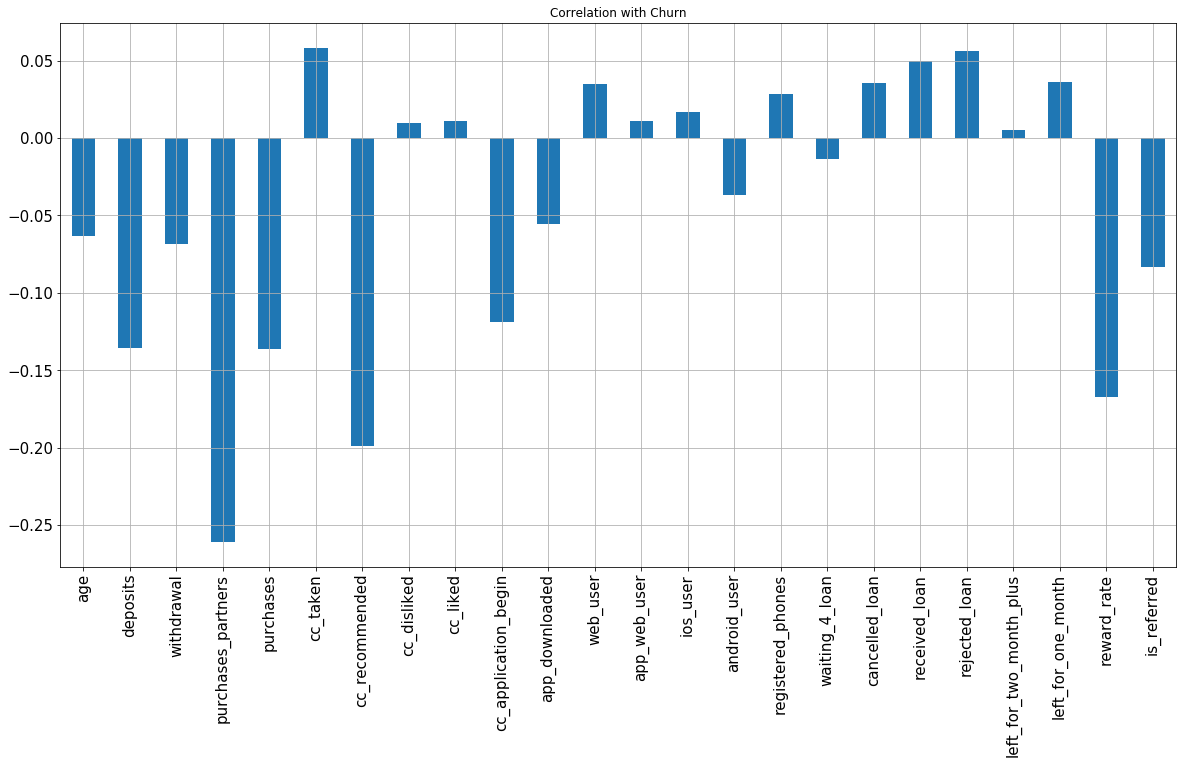

In [34]:
# Example observations/interpretations

# The younger you are, the more likely you are to churn.
# The less deposits, withdrawals, purchases partners and purchases the more likely to churn.
# The more cc_taken (credit cards taken), the more likely to churn. Perhaps users dislike the credit card services.
# The more recommendations we give to users, the less likely they are to churn.


ds.drop(columns = ['churn', 'user','housing','payment_type','zodiac_sign']).corrwith(ds.churn).plot.bar(
        figsize = (20,10), title = 'Correlation with Churn', fontsize = 15, rot = 90, grid = True)

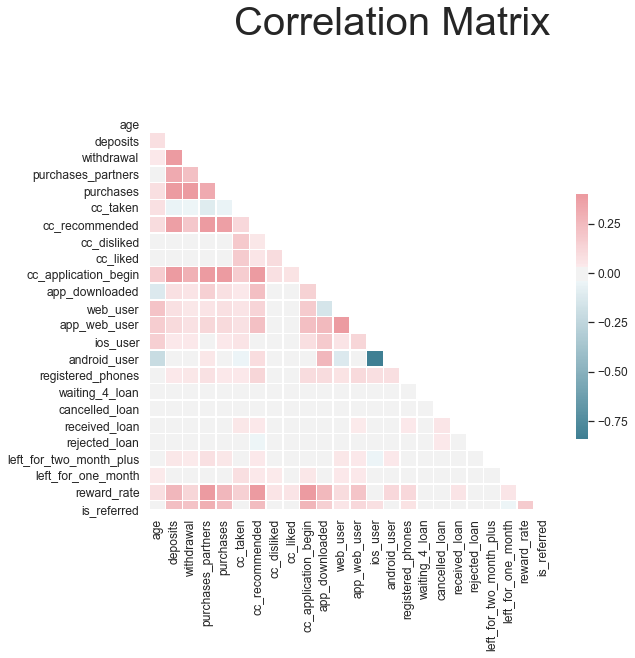

In [35]:
# Correlation matrix of independent variables

sns.set(style = 'white', font_scale = 1.1) # Builds the background

# Compute the correlation matrix
corr = ds.drop(columns = ['user','churn']).corr() # Creating a 2D array of each correlation feature to each other

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True # This creates a the lower diagonal of the matrix as it is symmetrical

# Set up the matplotlib figure
fig, axes = plt.subplots(figsize = (9,9)) # Size of the plot
fig.suptitle("Correlation Matrix", fontsize = 40) # Title

# Generate a custom diverging colourmap

cmap = sns.diverging_palette(220, 10, as_cmap = True) # Colouring

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.4, center = 0, 
            square = True, linewidth = 0.5, cbar_kws = {'shrink': 0.5})

# We observe a strong negative correlation between Android and iOS users which is understandable
# as, if you are an Android user you will not use iOS and vice versa.

In [36]:
# From a senior analyst, we have received a useful tip that the app_web_user variable
# is actually a function of web_user and app_downloaded. Therefore these variables are
# no longer independent. We will therefore remove the app_web_user column from the dataset
# and save it as a new csv file.

ds = ds.drop(columns = 'app_web_user')
ds = ds.to_csv('new_churn_data.csv', index = False)

**Note:** One of the main reasons why we wish to build a model with the least or optimal amount of variables is that, as a data analyst we should understand the data well. If we have many variables, we will be expected to know the significance of each variable and its ability to impact other variables and the responding variable. Although the correlation plot and the correlation matrix may indicate this, it does not explicitly tell us these in depth details.  

In [37]:
ds = pd.read_csv('new_churn_data.csv')

In [38]:
ds.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [39]:
user_identifier = ds.user
ds = ds.drop(columns = 'user')

# Taking care of categorical data

In [40]:
ds.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [41]:
ds = pd.get_dummies(ds)

In [42]:
ds.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [43]:
ds.head()

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
0,0,37.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,28.0,0,0,1,0,0,96,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,35.0,47,2,86,47,0,285,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,26.0,26,3,38,25,0,74,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,27.0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
ds.shape

(26996, 45)

# Avoiding the dummy variable trap

In [45]:
ds = ds.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [46]:
ds.shape

(26996, 42)

# Splitting the dataset into the training set and test set

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ds.drop(columns = 'churn'), ds.churn, test_size = 0.2, random_state = 0)

In [48]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11570,26.0,1,0,49,1,0,51,0,0,5,...,0,1,0,0,0,0,0,0,0,0
14315,25.0,0,0,84,0,0,234,0,0,6,...,0,0,0,0,0,0,0,1,0,0
11695,26.0,0,0,2,0,0,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16711,22.0,0,0,19,0,0,8,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19766,28.0,0,0,0,0,0,118,1,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,21.0,0,0,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19648,51.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,31.0,3,1,21,3,0,37,0,0,7,...,0,0,0,0,0,0,0,0,0,0
10799,33.0,0,0,9,0,0,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y_train

11570    0
14315    0
11695    1
16711    0
19766    1
        ..
13123    1
19648    0
9845     0
10799    0
2732     0
Name: churn, Length: 21596, dtype: int64

# Balancing the dataset

From the below we observe that the training dataset response variable contains around 60% 0's and 40% 1's. If we are building a model and the model predicts all values to be 0, the accuracy will be deemed 60% but it will be misleading. We will therefore need to balance the 0's and 1's in the response variable. If we have 50% 0's and 50% 1's, any additional accuracy the model produces will be seen as a result of the model being good, as opposed to a permutation of the results from the response variable.

In [50]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [51]:
pos_index = y_train[y_train == 1].index
neg_index = y_train[y_train == 0].index

In [52]:
# The below sets which is the higher list and which is the lower list.

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index

In [53]:
higher.shape

(12656,)

In [54]:
lower.shape

(8940,)

In [55]:
random.seed(0)

In [102]:
# This makes the higher and lower list the same size by randomly selecting the 
# same number of items from the higher list as there are in the lower list.

higher = np.random.choice(higher, size = len(lower))

In [103]:
type(higher)

numpy.ndarray

In [58]:
type(lower)

pandas.core.indexes.numeric.Int64Index

In [59]:
# To make higher and lower list the same type for consistency.

lower = np.asarray(lower)

In [60]:
new_indexes = np.concatenate((lower,higher))

In [61]:
new_indexes.shape

(17880,)

In [62]:
lower.shape

(8940,)

In [63]:
higher.shape

(8940,)

In [64]:
X_train = X_train.loc[new_indexes, ]
y_train = y_train.loc[new_indexes]

In [65]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,26.0,0,0,2,0,0,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19766,28.0,0,0,0,0,0,118,1,0,1,...,0,0,0,0,1,0,0,0,0,0
8354,35.0,0,0,0,0,0,266,0,0,5,...,0,0,0,0,0,0,0,0,0,1
17883,38.0,0,0,28,0,0,74,0,0,8,...,0,0,0,0,0,0,0,0,1,0
25149,24.0,1,0,22,1,0,39,0,0,5,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,33.0,0,0,11,0,0,21,0,0,6,...,0,0,0,0,1,0,0,0,0,0
20564,24.0,4,0,208,4,0,275,0,0,11,...,0,0,0,0,1,0,0,0,0,0
22264,56.0,18,2,78,18,0,178,0,0,12,...,1,0,0,0,0,0,0,0,0,0
25146,35.0,8,0,0,8,0,280,0,0,15,...,0,0,0,1,0,0,0,0,0,0


In [66]:
y_train

11695    1
19766    1
8354     1
17883    1
25149    1
        ..
10171    0
20564    0
22264    0
25146    0
6451     0
Name: churn, Length: 17880, dtype: int64

# Feature Scaling

**Note:** The Standard Scaler returns a numpy array of multiple dimensions. The problem with this process is that it loses the column names and index. The index is how we identify each set of fields to the user, and we would like the column names to be build within our model. We therefore save the scaled part into a different data frame by converting the result of the Standard Scaler into its data frame.

In [67]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [68]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [69]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [70]:
X_train = X_train2
X_test = X_test2

In [71]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.623920,-0.358738,-0.273072,-0.599940,-0.358472,-0.173854,-0.910165,-0.053866,-0.07382,-0.563526,...,-0.307760,-0.163405,-0.29293,-0.310907,-0.296740,-0.290447,-0.295846,-0.290333,-0.300959,-0.309173
19766,-0.425004,-0.358738,-0.273072,-0.649056,-0.358472,-0.173854,0.319638,0.902561,-0.07382,-0.563526,...,-0.307760,-0.163405,-0.29293,-0.310907,3.369955,-0.290447,-0.295846,-0.290333,-0.300959,-0.309173
8354,0.271200,-0.358738,-0.273072,-0.649056,-0.358472,-0.173854,2.004923,-0.053866,-0.07382,-0.245016,...,-0.307760,-0.163405,-0.29293,-0.310907,-0.296740,-0.290447,-0.295846,-0.290333,-0.300959,3.234430
17883,0.569574,-0.358738,-0.273072,0.038570,-0.358472,-0.173854,-0.181393,-0.053866,-0.07382,-0.006132,...,-0.307760,-0.163405,-0.29293,-0.310907,-0.296740,-0.290447,-0.295846,-0.290333,3.322710,-0.309173
25149,-0.822835,-0.245680,-0.273072,-0.108778,-0.243227,-0.173854,-0.579940,-0.053866,-0.07382,-0.245016,...,-0.307760,-0.163405,-0.29293,-0.310907,-0.296740,3.442973,-0.295846,-0.290333,-0.300959,-0.309173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,0.072285,-0.358738,-0.273072,-0.378917,-0.358472,-0.173854,-0.784907,-0.053866,-0.07382,-0.165388,...,-0.307760,-0.163405,-0.29293,-0.310907,3.369955,-0.290447,-0.295846,-0.290333,-0.300959,-0.309173
20564,-0.822835,0.093494,-0.273072,4.459024,0.102509,-0.173854,2.107406,-0.053866,-0.07382,0.232751,...,-0.307760,-0.163405,-0.29293,-0.310907,3.369955,-0.290447,-0.295846,-0.290333,-0.300959,-0.309173
22264,2.359814,1.676308,1.502072,1.266474,1.715941,-0.173854,1.002861,-0.053866,-0.07382,0.312378,...,3.249285,-0.163405,-0.29293,-0.310907,-0.296740,-0.290447,-0.295846,-0.290333,-0.300959,-0.309173
25146,0.271200,0.545727,-0.273072,-0.649056,0.563489,-0.173854,2.164342,-0.053866,-0.07382,0.551262,...,-0.307760,-0.163405,-0.29293,3.216392,-0.296740,-0.290447,-0.295846,-0.290333,-0.300959,-0.309173


In [72]:
X_test

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2834,-0.027173,0.884901,-0.273072,-0.624498,0.909225,2.007561,1.241990,-0.053866,-0.07382,1.825305,...,-0.30776,-0.163405,-0.292930,-0.310907,-0.29674,-0.290447,3.380132,-0.290333,-0.300959,-0.309173
21018,-0.723377,-0.358738,-0.273072,2.494378,-0.358472,-0.173854,1.708859,-0.053866,-0.07382,-0.404271,...,-0.30776,-0.163405,3.413785,-0.310907,-0.29674,-0.290447,-0.295846,-0.290333,-0.300959,-0.309173
5590,1.464694,0.884901,1.502072,-0.649056,0.909225,-0.173854,0.433508,1.858987,-0.07382,2.143816,...,-0.30776,-0.163405,-0.292930,-0.310907,-0.29674,-0.290447,-0.295846,-0.290333,3.322710,-0.309173
15769,0.072285,-0.358738,-0.273072,-0.452591,-0.358472,-0.173854,-1.001262,-0.053866,-0.07382,-0.563526,...,-0.30776,6.119772,-0.292930,-0.310907,-0.29674,-0.290447,-0.295846,-0.290333,-0.300959,-0.309173
15120,-1.021751,0.319611,-0.273072,3.206562,0.332999,-0.173854,1.743020,-0.053866,-0.07382,2.064188,...,-0.30776,-0.163405,-0.292930,3.216392,-0.29674,-0.290447,-0.295846,-0.290333,-0.300959,-0.309173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,4.448428,-0.358738,-0.273072,-0.649056,-0.358472,-0.173854,-1.012649,-0.053866,-0.07382,-0.643154,...,-0.30776,-0.163405,-0.292930,-0.310907,-0.29674,-0.290447,3.380132,-0.290333,-0.300959,-0.309173
9851,0.569574,-0.245680,0.614500,-0.624498,-0.243227,-0.173854,-1.024036,-0.053866,-0.07382,-0.643154,...,-0.30776,-0.163405,-0.292930,-0.310907,-0.29674,-0.290447,-0.295846,-0.290333,-0.300959,-0.309173
654,0.470116,-0.358738,-0.273072,-0.649056,-0.358472,2.007561,1.287538,-0.053866,-0.07382,-0.085760,...,-0.30776,-0.163405,-0.292930,-0.310907,-0.29674,-0.290447,-0.295846,-0.290333,3.322710,-0.309173
26248,-0.524462,-0.132622,-0.273072,0.357825,-0.127981,-0.173854,-0.295264,-0.053866,-0.07382,-0.404271,...,-0.30776,-0.163405,-0.292930,-0.310907,-0.29674,-0.290447,3.380132,-0.290333,-0.300959,-0.309173


# Fitting the Logistic Regression to the dataset.

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)

In [74]:
lr.fit(X_train, y_train)

/Users/mohitgoel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
# Predicting the test set results

y_pred = lr.predict(X_test)

# Model Evaluation - Confusion Matrix and K-Fold Cross Validation

In [76]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1637 1529]
 [ 554 1680]]


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.52      0.61      3166
           1       0.52      0.75      0.62      2234

    accuracy                           0.61      5400
   macro avg       0.64      0.63      0.61      5400
weighted avg       0.65      0.61      0.61      5400



In [78]:
accuracy_score(y_test, y_pred)

0.6142592592592593

In [79]:
# This is a function of precision_score and recall_score, and it balances
# them out.
f1_score(y_test, y_pred)

0.6173066323718538

In [80]:
# (True Positives)/(True Positives + False Positives)
# Of all the positives predicted, how many of them are correct.

precision_score(y_test, y_pred)

0.5235275786849486

In [81]:
# (True Positives)/(True Positives + False Negatives)
# Of all the positives that truly exist, how many did we predict as true.

recall_score(y_test, y_pred)

0.7520143240823635

In [82]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
accuracy_mean = cvs.mean()
accuracy_std = cvs.std()
print(cvs)
print(accuracy_mean)
print(accuracy_std)

[0.62472036 0.67114094 0.65883669 0.64149888 0.65268456 0.64932886
 0.65324385 0.6442953  0.6409396  0.66331096]
0.65
0.012435239305845587


# Analysing Coefficients

In [83]:
pd.concat([pd.DataFrame(X_train.columns, columns = ['Features']),
           pd.DataFrame(np.transpose(lr.coef_), columns = ['Coef'])],
           axis = 1)

,Features,Coef
0,age,-0.180196
1,deposits,0.429621
2,withdrawal,0.043019
3,purchases_partners,-0.737632
4,purchases,-0.557657
5,cc_taken,0.071065
6,cc_recommended,0.103819
7,cc_disliked,-0.024573
8,cc_liked,0.018710
9,cc_application_begin,0.027656


# Feature Selection

With less features and the same accuracy, the model will be lighter and faster to run

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [85]:
rfe = RFE(estimator = lr, n_features_to_select = 20)

In [86]:
rfe = rfe.fit(X_train, y_train)

# Summarising the selection of the attributes

In [87]:
print(rfe.support_)

[ True  True  True  True  True  True  True False False False False  True
  True False  True False  True  True  True False  True  True False  True
 False False False False  True False False  True False False False False
  True False False False  True]


In [88]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_one_month', 'reward_rate', 'housing_O', 'payment_type_Weekly',
       'zodiac_sign_Cancer', 'zodiac_sign_Pisces', 'zodiac_sign_Virgo'],
      dtype='object')

In [89]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  8, 11,  4,  5,  1,  1, 14,  1,  2,  1,
        1,  1,  3,  1,  1, 18,  1, 13, 12, 22, 15,  1, 17,  7,  1,  9, 20,
        6, 21,  1, 19, 10, 16,  1])

# Fitting the Logistic Regression to the dataset

In [90]:
lr.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
# Predicting the test set results

y_pred = lr.predict(X_test[X_test.columns[rfe.support_]])

# Model Evaluation - Confusion Matrix and K-Fold Cross Validation

In [92]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1617 1549]
 [ 560 1674]]


In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.51      0.61      3166
           1       0.52      0.75      0.61      2234

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.61      5400



In [94]:
accuracy_score(y_test, y_pred)

0.6094444444444445

In [95]:
# This is a function of precision_score and recall_score, and it balances
# them out.
f1_score(y_test, y_pred)

0.6135239142385926

In [96]:
# (True Positives)/(True Positives + False Positives)
# Of all the positives predicted, how many of them are correct.

precision_score(y_test, y_pred)

0.5193918709277071

In [97]:
# (True Positives)/(True Positives + False Negatives)
# Of all the positives that truly exist, how many did we predict as true.

recall_score(y_test, y_pred)

0.7493285586392122

# Analysing Coefficients

In [98]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns = ['Features']),
           pd.DataFrame(np.transpose(lr.coef_), columns = ['Coef'])],
           axis = 1)

,Features,Coef
0,age,-0.174006
1,deposits,0.418849
2,withdrawal,0.046369
3,purchases_partners,-0.732077
4,purchases,-0.538818
5,cc_taken,0.073917
6,cc_recommended,0.124061
7,web_user,0.108696
8,ios_user,0.083973
9,registered_phones,0.080460


# Final Result

In [99]:
results = pd.concat([y_test, user_identifier], axis = 1).dropna()
results['predicted_churn'] = y_pred
results = results[['user','churn','predicted_churn']].reset_index(drop = True)

In [101]:
print(results)

       user  churn  predicted_churn
0     61353    1.0                1
1     67679    0.0                0
2     21269    0.0                0
3     69531    0.0                1
4     25997    0.0                0
...     ...    ...              ...
5395  22377    0.0                1
5396  24291    1.0                1
5397  23740    0.0                1
5398  47663    1.0                0
5399  52752    1.0                1

[5400 rows x 3 columns]
